## Day 28 Lecture 2 Assignment

In this assignment, we will learn about overfitting and regularization. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [1]:
%matplotlib inline

import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.stattools import acf
from sklearn_pandas import DataFrameMapper

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.linear_model import Ridge, Lasso

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Perform the same transformations in the previous assignment to meet model assumptions:
1. Remove all columns except: price, bedrooms, bathrooms, sqft_living, floors, waterfront
1. Remove outliers
1. Split the data into train and test subsets. 20% of the data should be in the test subset

In [4]:
# answer below:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront']
kc_df = king_county.copy()
kc_df = kc_df[features]

kc_df.drop(kc_df[kc_df['bedrooms']> 30].index, inplace=True)
kc_df.drop(kc_df[kc_df['price']> 5000000].index, inplace=True)
kc_df.drop(kc_df[kc_df['sqft_living']> 10000].index, inplace=True)

y_log = pd.Series(np.log(kc_df['price']), index=kc_df.index)
y = kc_df['price']
X = kc_df.drop(['price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Apply a ridge regression model with lambda=50 to the data and evaluate by looking at r squared for test and train

In [5]:
# answer below:
ridge = Ridge(alpha=50)
ridge.fit(X_train, y_train)

print(f'Ridge Train R-square: {ridge.score(X_train, y_train)}')
print(f'Ridge Test R-square: {ridge.score(X_test, y_test)}')

Ridge Train R-square: 0.5284218044964626
Ridge Test R-square: 0.5359229968829706


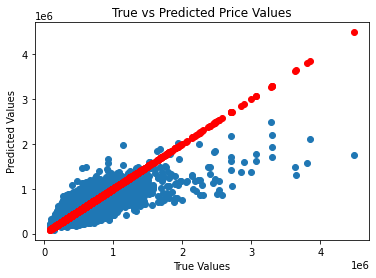

In [6]:
y_preds = ridge.predict(X_test)

plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Price Values')
plt.show()

Perform a grid search for the following values of alpha: 0.001, 0.01, 0.1, 1, 10, 100, 1000 to find the most optimal ridge regression model. Experiment with different scoring metrics in the grid search (R^2 is the default, but you can use root mean squared error or many others). 
https://scikit-learn.org/stable/modules/model_evaluation.html

In [7]:
def mean_absolute_percentage_error(y_test, y_preds):
  return np.mean(np.abs((y_test - y_preds) / y_test)) * 100

In [8]:
#answer below:
grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

lasso_cv = GridSearchCV(Lasso(), grid, verbose=1, cv=5)
lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [9]:
print(f'Selected Alpha: {lasso_cv.best_estimator_.alpha}')

Selected Alpha: 0.001


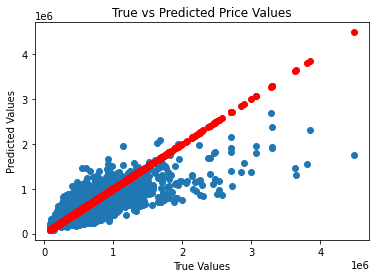

MAE: 165604.18195623136
MSE: 60988504114.51701
RMSE: 246958.50686809112
MAPE: 34.19487313165734
R2: 0.541080283483415


In [10]:
y_preds = lasso_cv.predict(X_test)

plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Price Values')
plt.show()

print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')
print(f'RMSE: {mean_squared_error(y_test, y_preds, squared=False)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_preds)}')
print(f'R2: {r2_score(y_test, y_preds)}')

In [12]:
lasso_cv_test1 = GridSearchCV(Lasso(), grid, scoring='neg_mean_squared_error', verbose=1, cv=5)
lasso_cv_test1.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=1)

In [13]:
print(f'Selected Alpha: {lasso_cv_test1.best_estimator_.alpha}')

Selected Alpha: 0.001


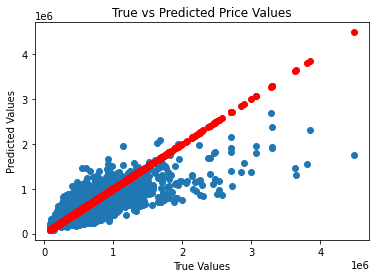

MAE: 165604.18195623136
MSE: 60988504114.51701
RMSE: 246958.50686809112
MAPE: 34.19487313165734
R2: 0.541080283483415


In [14]:
y_preds = lasso_cv_test1.predict(X_test)

plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Price Values')
plt.show()

print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')
print(f'RMSE: {mean_squared_error(y_test, y_preds, squared=False)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_preds)}')
print(f'R2: {r2_score(y_test, y_preds)}')

In [15]:
lasso_cv_test2 = GridSearchCV(Lasso(), grid, scoring='explained_variance', verbose=1, cv=5)
lasso_cv_test2.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='explained_variance', verbose=1)

In [16]:
print(f'Selected Alpha: {lasso_cv_test2.best_estimator_.alpha}')

Selected Alpha: 0.001


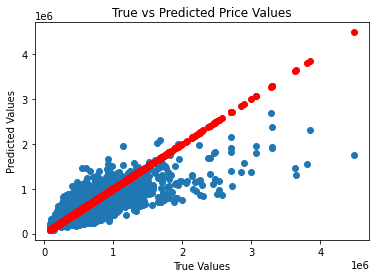

MAE: 165604.18195623136
MSE: 60988504114.51701
RMSE: 246958.50686809112
MAPE: 34.19487313165734
R2: 0.541080283483415


In [17]:
y_preds = lasso_cv_test2.predict(X_test)

plt.scatter(y_test, y_preds)
plt.scatter(y_test, y_test, color='red')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Price Values')
plt.show()

print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')
print(f'RMSE: {mean_squared_error(y_test, y_preds, squared=False)}')
print(f'MAPE: {mean_absolute_percentage_error(y_test, y_preds)}')
print(f'R2: {r2_score(y_test, y_preds)}')